In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [2]:
url = 'https://api.spacexdata.com/v5/launches/'
response = requests.get(url)

In [3]:
# Check if the response is successful
if response.status_code == 200:
    # Load the data into a pandas DataFrame
    data = response.json()
    df = pd.json_normalize(data)  # Flatten nested structures

    # Show the first few rows for reference
    df.head()
else:
    df = None
    response.status_code  # return the error code if failed

In [5]:
df.head(1)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN


In [6]:
df['failures_normalized'] = df['failures'].apply(lambda x: x[0] if len(x) > 0 else {})
failures_df = pd.json_normalize(df['failures_normalized']).add_prefix('failure_')
df = pd.concat([df.drop(columns=['failures_normalized','failures']), failures_df], axis=1)

In [7]:
df['cores_normalized'] = df['cores'].apply(lambda x: x[0] if len(x) > 0 else {})
cores_df = pd.json_normalize(df['cores_normalized']).add_prefix('core_')
df = pd.concat([df.drop(columns=['cores_normalized','cores']), cores_df], axis=1)

In [8]:
df = df.applymap(lambda x: np.nan if (x is None or (isinstance(x, list) and len(x) == 0)) else x)


In [9]:
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'details', 'crew', 'ships', 'capsules', 'payloads',
       'launchpad', 'flight_number', 'name', 'date_utc', 'date_unix',
       'date_local', 'date_precision', 'upcoming', 'auto_update', 'tbd',
       'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings', 'failure_time', 'failure_altitude', 'failure_reason',
       'core_core', 'core_flight', 'core_gridfins', 'core_legs', 'core_reused',
       'core_landing_attempt', 'core_landing_success', 'core_landing_type',
       'core_landpad'],
      dtype='object

In [102]:
df.shape

(205, 53)

In [103]:
df.dtypes.reset_index()

,index,0
0,static_fire_date_utc,object
1,static_fire_date_unix,float64
2,net,bool
3,window,float64
4,rocket,object
5,success,object
6,details,object
7,crew,object
8,ships,object
9,capsules,object


In [105]:
date_columns = ['date_utc']

# Convert specified columns to datetime
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [106]:
cols_to_keep = ['id','name','success','flight_number','launchpad','failure_time','failure_altitude','failure_reason','core_core','core_flight','core_reused','core_landing_success','date_utc']

In [107]:
df = df.loc[:,cols_to_keep]

In [108]:
df.isna().mean().reset_index().sort_values(by=0, ascending = False)

,index,0
6,failure_altitude,0.980488
5,failure_time,0.975610
7,failure_reason,0.975610
11,core_landing_success,0.239024
2,success,0.092683
8,core_core,0.082927
9,core_flight,0.082927
10,core_reused,0.029268
0,id,0.000000
1,name,0.000000


In [109]:
df.describe()

,flight_number,failure_time,failure_altitude,core_flight
count,205.000000,5.000000,4.000000,188.000000
mean,102.814634,-32913.400000,91.000000,3.622340
std,59.029112,73939.339179,133.194094,3.263955
min,1.000000,-165180.000000,0.000000,1.000000
25%,52.000000,33.000000,26.250000,1.000000
50%,103.000000,139.000000,37.500000,2.000000
75%,154.000000,140.000000,102.250000,5.000000
max,203.000000,301.000000,289.000000,14.000000


In [110]:
df.describe(include='all')

,id,name,success,flight_number,launchpad,failure_time,failure_altitude,failure_reason,core_core,core_flight,core_reused,core_landing_success,date_utc
count,205,205,186,205.000000,205,5.000000,4.000000,5,188,188.000000,199,156,205
unique,205,205,2,NaN,4,NaN,NaN,5,75,NaN,2,2,199
top,5eb87cd9ffd86e000604b32a,FalconSat,True,NaN,5e9e4501f509094ba4566f84,NaN,NaN,merlin engine failure,5e9e28a7f3591817f23b2663,NaN,True,True,2022-12-01 00:00:00+00:00
freq,1,1,181,NaN,112,NaN,NaN,1,14,NaN,115,143,5
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-24 22:30:00+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 00:00:00+00:00
mean,NaN,NaN,NaN,102.814634,NaN,-32913.400000,91.000000,NaN,NaN,3.622340,NaN,NaN,NaN
std,NaN,NaN,NaN,59.029112,NaN,73939.339179,133.194094,NaN,NaN,3.263955,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,-165180.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,52.000000,NaN,33.000000,26.250000,NaN,NaN,1.000000,NaN,NaN,NaN


In [111]:
df['launch_year'] = df['date_utc'].dt.year
df['launch_month'] = df['date_utc'].dt.month

In [115]:
num_cols = df.select_dtypes(include=['number']).columns

In [123]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

In [124]:
cat_cols

Index(['id', 'name', 'success', 'launchpad', 'failure_reason', 'core_core',
       'core_reused', 'core_landing_success'],
      dtype='object')

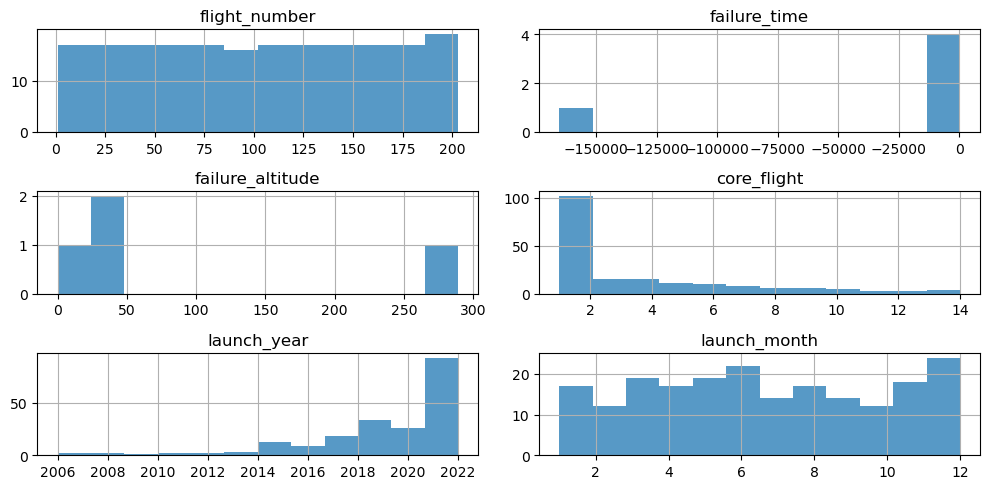

In [121]:
df.loc[:, num_cols].hist(bins=12, figsize=(10, 5), alpha=0.75)
plt.tight_layout()
plt.show()

In [133]:
cat_cols = ['name','success','launchpad','failure_reason','core_reused','core_landing_success']

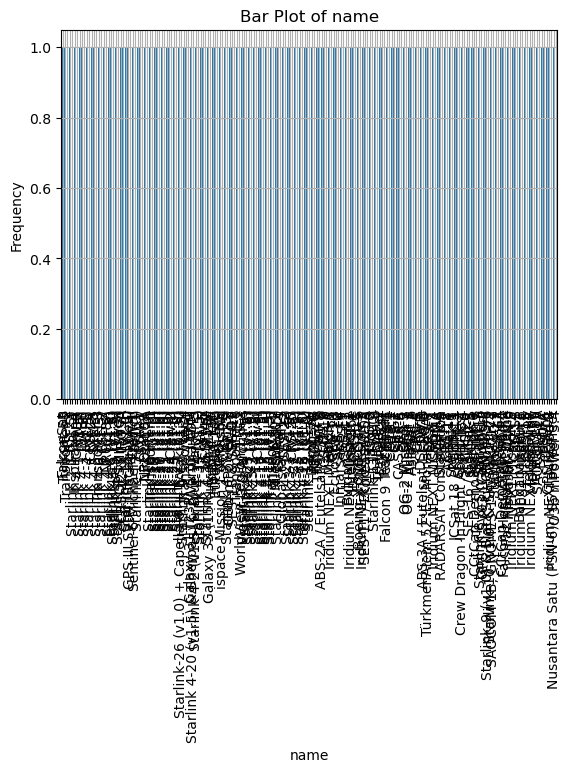

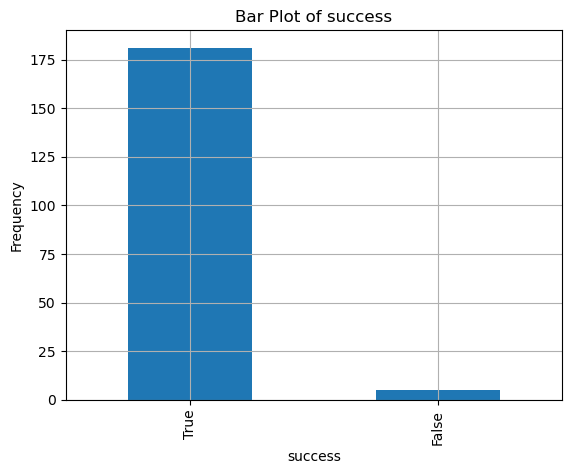

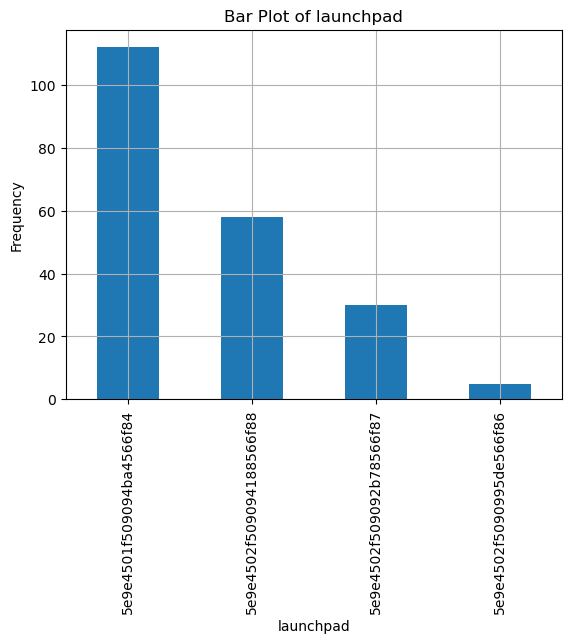

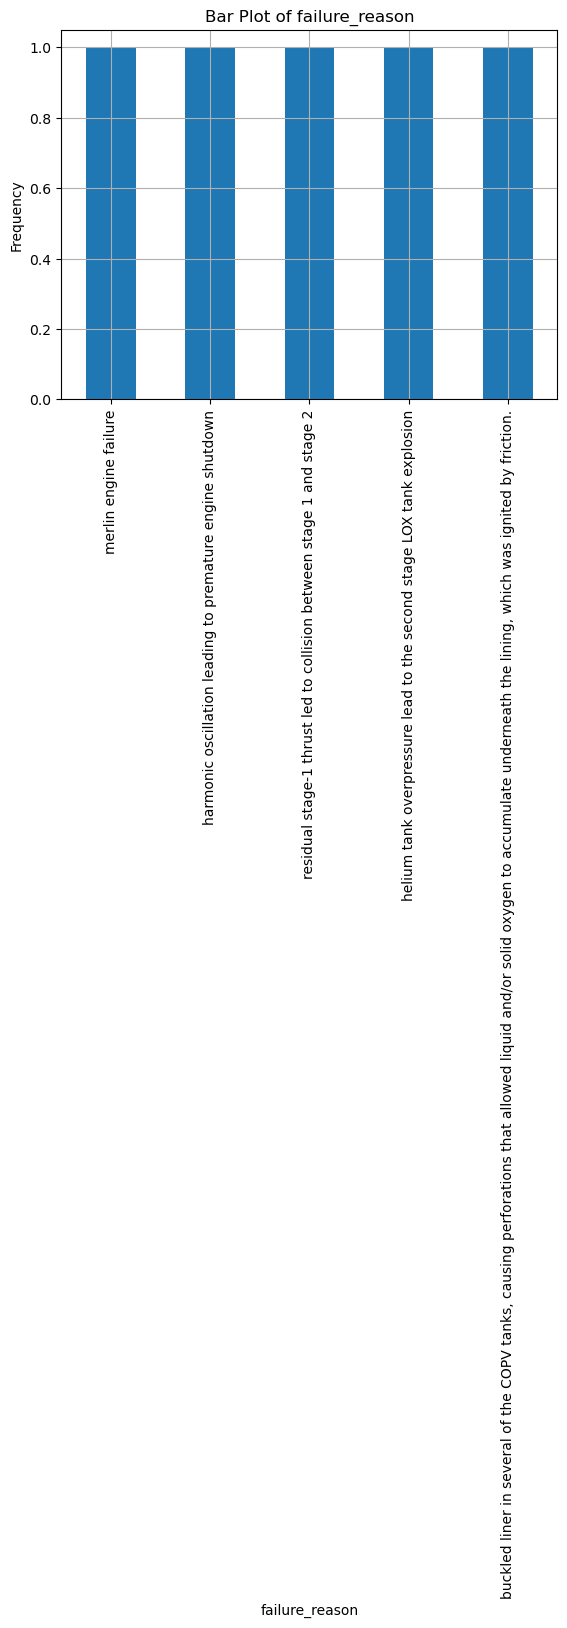

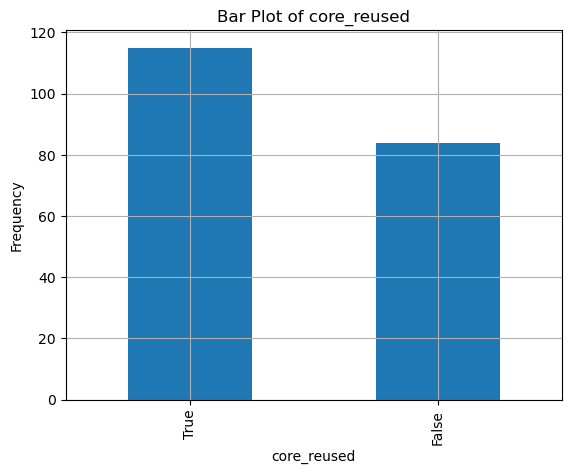

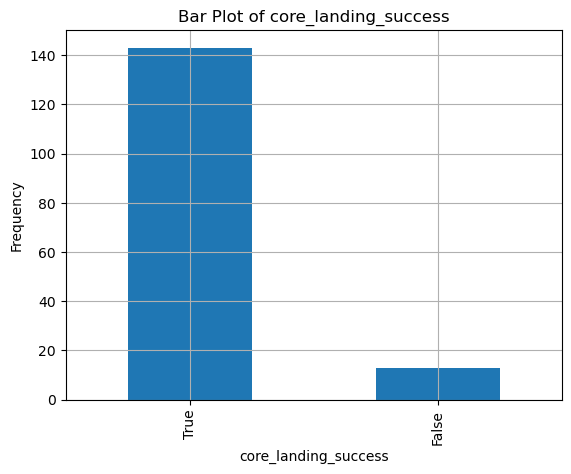

In [134]:
for column in cat_cols:
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
df.groupby('year').